## Se importan Librerias

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
warnings.filterwarnings('ignore')

In [33]:
# Creando el dataframe

df = pd.read_excel("FuelConsumptionCo2.xlsx")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [34]:
# se eliminan las columnas categoricas
df.drop(['MODELYEAR','MAKE','MODEL','TRANSMISSION','VEHICLECLASS','FUELTYPE'], axis=1, inplace=True)
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,33,200
1,3.5,6,12.6,9.4,11.2,25,263
2,2.0,4,11.0,8.6,9.9,29,232
3,2.0,4,11.3,9.1,10.3,27,242
4,2.0,4,11.2,8.0,9.8,29,230


In [35]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,3.201058,5.670899,12.515767,9.374603,11.102222,27.222222,259.410582
std,1.374256,1.932837,3.452369,2.290217,2.878074,7.684409,64.486225
min,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000
50%,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,258.000000
75%,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,301.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000


No hay valores nulos en el dataframe


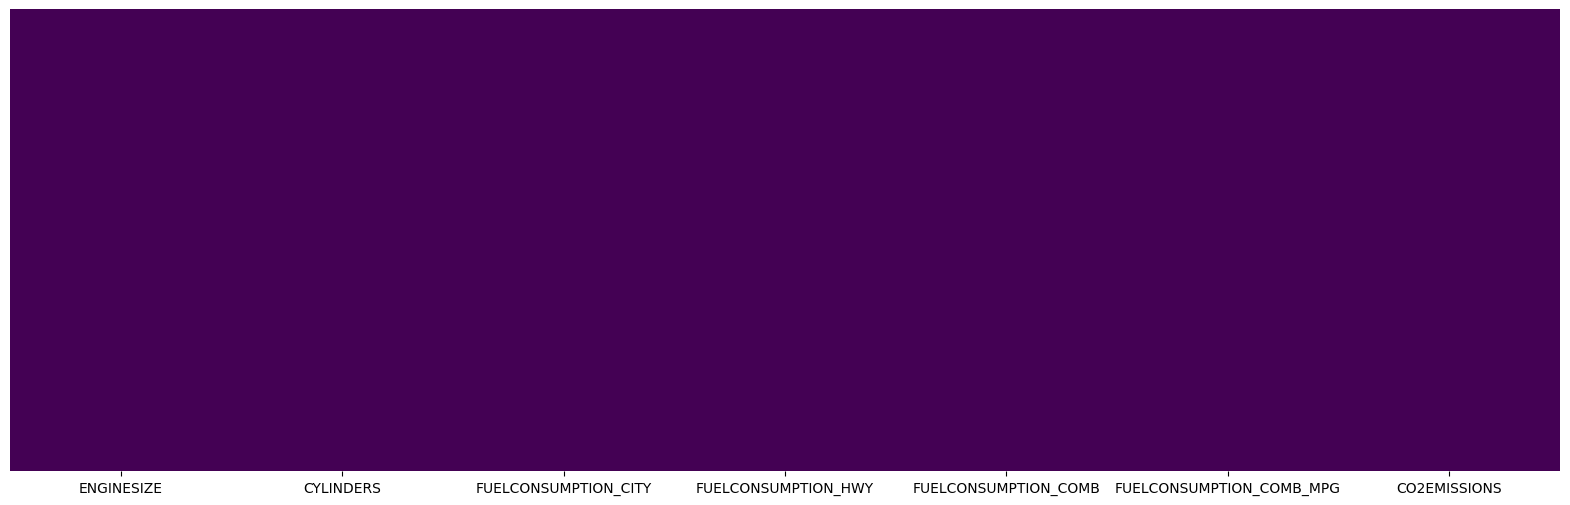

In [36]:
# Se Genera grafica para visualizar si hay valores nulos
# y dará un aviso si hay valores nulos

plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
if df.isnull().sum().sum() > 0:
    print("Hay valores nulos en el dataframe")
else:
    print("No hay valores nulos en el dataframe")

In [37]:
# Derterminando las variables donde buscaremos la relacion con CO2EMISSIONS
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

In [38]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajusta el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# Ajusta el modelo de regresión Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Evalúa el modelo de regresión lineal
print("Regresión Lineal:")
print("Valor de R2: ", r2_score(y_test, y_pred_lin))
print("Error absoluto medio: ", mean_absolute_error(y_test, y_pred_lin))
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred_lin))
print("Raíz del error cuadrático medio: ", np.sqrt(mean_squared_error(y_test, y_pred_lin)))

# Evalúa el modelo de regresión Ridge
print("\nRegresión Ridge:")
print("Valor de R2: ", r2_score(y_test, y_pred_ridge))
print("Error absoluto medio: ", mean_absolute_error(y_test, y_pred_ridge))
print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred_ridge))
print("Raíz del error cuadrático medio: ", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Regresión Lineal:
Valor de R2:  0.8808562241490012
Error absoluto medio:  7.366543450200364
Error cuadrático medio:  441.6572416705389
Raíz del error cuadrático medio:  21.015642785090797

Regresión Ridge:
Valor de R2:  0.8810056081066047
Error absoluto medio:  7.384649777390558
Error cuadrático medio:  441.1034862922679
Raíz del error cuadrático medio:  21.002463814806774
